# Разведывательный анализ чистых данных

### 1 Загрузка данных и подключение библиотек

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

Константы

In [3]:
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))

In [4]:
GROUP_CLEAN = 'ПР'

Загружаем справочники

In [5]:
DOCS_DOMAIN_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'domain.xlsx')
DOCS_PHYLUM_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'phylum.xlsx')
DOCS_CLASS_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'class.xlsx')
DOCS_ORDER_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'order.xlsx')
DOCS_FAMILY_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'family.xlsx')
DOCS_SPECIES_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'species.xlsx')

DOCS_FULL_PATH = os.path.join(BASE_DIR, 'data', 'docs', 'full.xlsx')

In [6]:
df_domain = pd.read_excel(DOCS_DOMAIN_PATH)
df_phylum = pd.read_excel(DOCS_PHYLUM_PATH)
df_class = pd.read_excel(DOCS_CLASS_PATH)
df_order = pd.read_excel(DOCS_ORDER_PATH)
df_family = pd.read_excel(DOCS_FAMILY_PATH)
df_species = pd.read_excel(DOCS_SPECIES_PATH)

df_docs = pd.read_excel(DOCS_FULL_PATH)

In [7]:
df_docs.head()

,id_species,species,id_family,family,id_order,order,id_class,class,id_phylum,phylum,id_domain,domain
0,1,Arthrobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
1,2,Galactobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
2,3,Corynebacterium,2,Corynebacteriaceae,2,Mycobacteriales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
3,4,Adlercreutzia,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria
4,5,Gordonibacter,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria


Загружаем данные для анализа

In [8]:
DATA_CLEAN_PATH = os.path.join(BASE_DIR, 'data', 'clean', 'data.xlsx')
DATA_CLEAN_UNWRAP_PATH = os.path.join(BASE_DIR, 'data', 'clean', 'data_unwrap.xlsx')

In [9]:
df_clean = pd.read_excel(DATA_CLEAN_PATH)
df_clean_unwrap = pd.read_excel(DATA_CLEAN_UNWRAP_PATH)

In [10]:
df_clean.head()

,group,Arthrobacter,Galactobacter,Corynebacterium,Adlercreutzia,Gordonibacter,Paraeggerthella,Rubneribacter,Slackia,unclassified_Eggerthellaceae,...,Turicimonas,Vampirovibrio,Enterobacter,Escherichia/Shigella,Klebsiella,unclassified_Enterobacteriaceae,Acinetobacter,Stenotrophomonas,unclassified_Bacteria,unclassified_Dothideomycetes
0,ПР,0,0,0,5,0,0,77,0,0,...,3,23,487,0,5,0,3,3,3,0
1,ПР,0,0,5,10,0,0,95,3,0,...,0,8,100,0,0,0,0,3,4,0
2,ПДР,0,0,3,0,0,0,22,0,0,...,0,0,56,6,0,0,0,4,0,0
3,ПДР,10,0,0,0,0,0,23,0,3,...,9,21,316,11,5,0,0,26,3,0
4,Целлюлоза,0,4,3,0,0,0,19,0,0,...,8,0,323,8,6,0,0,0,0,0


In [11]:
df_clean_unwrap.head()

,group,id_species,colonies
0,ПР,1,0
1,ПР,2,0
2,ПР,3,0
3,ПР,4,5
4,ПР,5,0


In [12]:
df_species.head()

,id,id_family,name
0,1,1,Arthrobacter
1,2,1,Galactobacter
2,3,2,Corynebacterium
3,4,3,Adlercreutzia
4,5,3,Gordonibacter


Соединяем по всем справочникам

In [13]:
df_clean_unwrap_docs = df_clean_unwrap.merge(df_docs, on=['id_species'], how='left')
df_clean_unwrap_docs.head()

,group,id_species,colonies,species,id_family,family,id_order,order,id_class,class,id_phylum,phylum,id_domain,domain
0,ПР,1,0,Arthrobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
1,ПР,2,0,Galactobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
2,ПР,3,0,Corynebacterium,2,Corynebacteriaceae,2,Mycobacteriales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
3,ПР,4,5,Adlercreutzia,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria
4,ПР,5,0,Gordonibacter,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria


### 2 Анализ макро-характеристик

Ссылка на [цвета](https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py) для отрисовки

Посмотрим какие признакми можно убрать из анализа где количество колони равно 0

In [14]:
df_clean.sum(axis=0)[lambda x: x == 0]

Paraeggerthella                       0
Sarcina                               0
Clostridium sensu stricto             0
Clostridium XlVa                      0
Faecalimonas                          0
Terrisporobacter                      0
unclassified_Peptostreptococcaceae    0
Turicibacter                          0
dtype: object

Запомним строки чтобы в дальнейшем исключить их из анализа

In [15]:
ZEROS_FEATURES = list(df_clean.groupby(by=['group']).mean().sum(axis=0)[lambda x: x == 0].index)
ZEROS_FEATURES

['Paraeggerthella',
 'Sarcina',
 'Clostridium sensu stricto',
 'Clostridium XlVa',
 'Faecalimonas',
 'Terrisporobacter',
 'unclassified_Peptostreptococcaceae',
 'Turicibacter']

#### 2.1 График среднего числа колоний по группам

In [16]:
df_clean

,group,Arthrobacter,Galactobacter,Corynebacterium,Adlercreutzia,Gordonibacter,Paraeggerthella,Rubneribacter,Slackia,unclassified_Eggerthellaceae,...,Turicimonas,Vampirovibrio,Enterobacter,Escherichia/Shigella,Klebsiella,unclassified_Enterobacteriaceae,Acinetobacter,Stenotrophomonas,unclassified_Bacteria,unclassified_Dothideomycetes
0,ПР,0,0,0,5,0,0,77,0,0,...,3,23,487,0,5,0,3,3,3,0
1,ПР,0,0,5,10,0,0,95,3,0,...,0,8,100,0,0,0,0,3,4,0
2,ПДР,0,0,3,0,0,0,22,0,0,...,0,0,56,6,0,0,0,4,0,0
3,ПДР,10,0,0,0,0,0,23,0,3,...,9,21,316,11,5,0,0,26,3,0
4,Целлюлоза,0,4,3,0,0,0,19,0,0,...,8,0,323,8,6,0,0,0,0,0
5,Целлюлоза,0,0,0,0,0,0,73,0,0,...,0,15,77,11,0,0,0,0,3,3
6,Лакт,0,0,0,11,4,0,146,0,0,...,0,0,350,5,12,0,0,0,0,0
7,Лакт,0,0,0,0,0,0,98,5,0,...,8,31,35,0,3,0,0,0,12,0
8,Энтеросгель,0,0,0,8,6,0,128,0,0,...,3,8,47,0,0,0,0,0,0,0
9,Энтеросгель,0,0,3,16,33,0,238,23,0,...,5,188,331,12,8,0,0,32,21,0


group
Fe             23412.0
АУ             25420.0
Биф            23120.5
Лакт           27565.0
Медь           27549.0
ПДР            21102.0
ПР             25726.5
Спор           26073.5
Хит            23049.5
Целлюлоза      19473.5
Энтеросгель    27207.0
dtype: float64


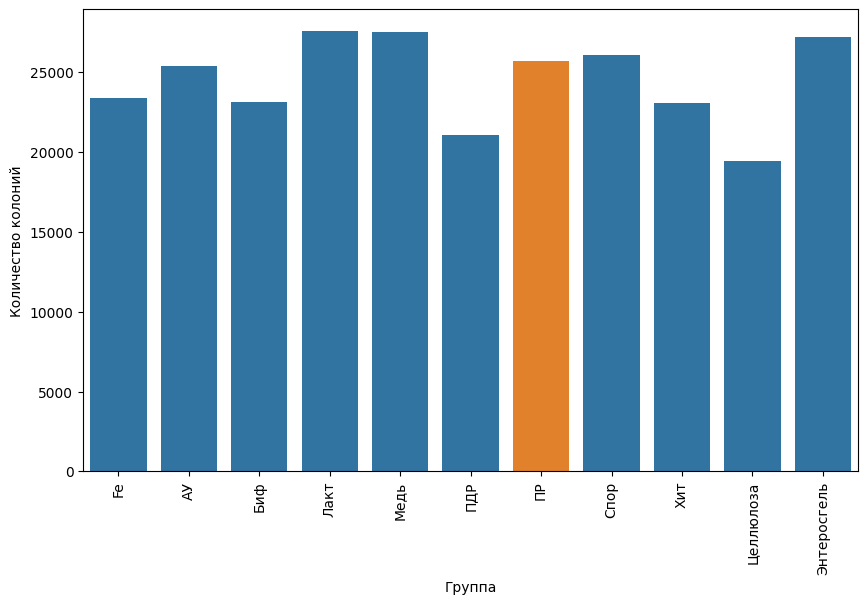

In [17]:
def plot_mean_sum_colonies_by_groups():
    group_counts = df_clean.groupby(by=['group']).mean().sum(axis=1)
    print(group_counts)
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['tab:blue' if x!=GROUP_CLEAN else 'tab:orange' for x in group_counts.index]
    ax.set_xlabel('Группа')
    ax.set_ylabel('Количество колоний')
    ax.tick_params(axis='x', labelrotation=90)
    sns.barplot(y=group_counts.values, x=group_counts.index, ax=ax, palette=colors)
    None
plot_mean_sum_colonies_by_groups()

#### 2.2 Диаграмма размаха числа колоний по группам

          group    sum
15           Fe  17465
14           Fe  29359
10           АУ  21489
11           АУ  29351
17          Биф  30437
16          Биф  15804
6          Лакт  27277
7          Лакт  27853
13         Медь  27625
12         Медь  27473
2           ПДР  22663
3           ПДР  19541
0            ПР  17833
1            ПР  33620
18         Спор  23756
19         Спор  28391
20          Хит  21915
21          Хит  24184
5     Целлюлоза  21318
4     Целлюлоза  17629
9   Энтеросгель  31371
8   Энтеросгель  23043


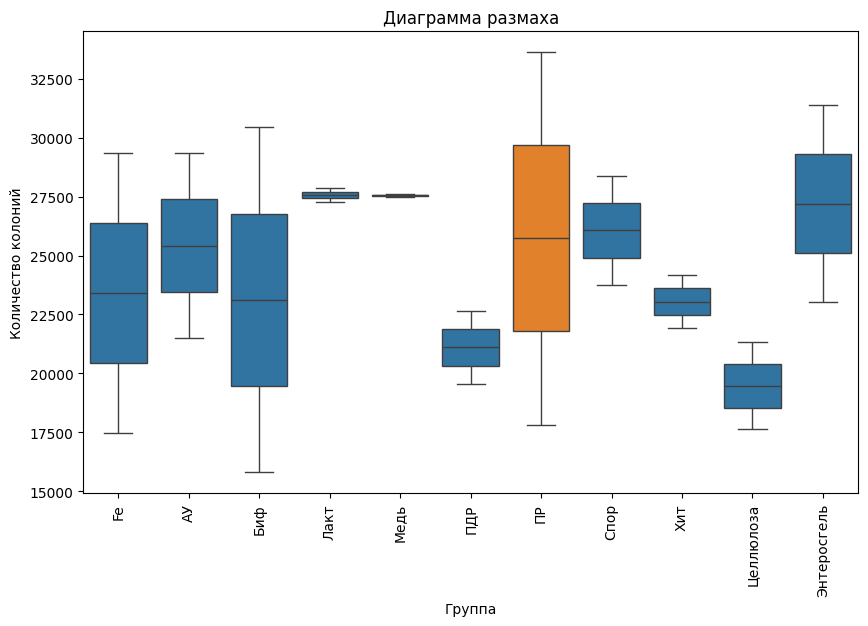

In [31]:
def plot_all_sum_colonies_by_groups():
    group_counts = df_clean[['group']]
    group_counts['sum'] = df_clean.sum(axis=1, numeric_only=True)
    group_counts = group_counts.sort_values(by=['group'])
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel('Группа')
    ax.set_ylabel('Количество колоний')
    colors = ['tab:blue' if x!=GROUP_CLEAN else 'tab:orange' for x in group_counts.group.unique()]
    ax.tick_params(axis='x', labelrotation=90)
    print(group_counts)
    sns.boxplot(data=group_counts, x='group', y='sum', ax=ax, palette=colors)
    plt.title("Диаграмма размаха")
plot_all_sum_colonies_by_groups()

#### 2.3 Тепловые карты относительных значений отдельных строк по категориям групп бактерий

##### 2.3.1 Домены

In [32]:
df_clean_unwrap_docs.head()

,group,id_species,colonies,species,id_family,family,id_order,order,id_class,class,id_phylum,phylum,id_domain,domain
0,ПР,1,0,Arthrobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
1,ПР,2,0,Galactobacter,1,Micrococcaceae,1,Micrococcales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
2,ПР,3,0,Corynebacterium,2,Corynebacteriaceae,2,Mycobacteriales,1,Actinobacteria,1,Actinobacteria,1,Bacteria
3,ПР,4,5,Adlercreutzia,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria
4,ПР,5,0,Gordonibacter,3,Eggerthellaceae,3,Eggerthellales,2,Coriobacteriia,1,Actinobacteria,1,Bacteria


In [37]:
df_clean_unwrap_docs.groupby(by=['group', 'domain'])['colonies'].sum().reset_index()

,group,domain,colonies
0,Fe,Bacteria,46824
1,Fe,Fungi,0
2,АУ,Bacteria,50840
3,АУ,Fungi,0
4,Биф,Bacteria,46241
5,Биф,Fungi,0
6,Лакт,Bacteria,55130
7,Лакт,Fungi,0
8,Медь,Bacteria,55098
9,Медь,Fungi,0


In [36]:
table = pd.pivot_table(df_clean_unwrap_docs, values='colonies', index=['group'], columns=['domain'])
table

domain,Bacteria,Fungi
group,,
Fe,218.803738,0.0
АУ,237.570093,0.0
Биф,216.079439,0.0
Лакт,257.616822,0.0
Медь,257.467290,0.0
ПДР,197.214953,0.0
ПР,240.434579,0.0
Спор,243.677570,0.0
Хит,215.415888,0.0


In [ ]:

group_counts = df_clean[['group']]
group_counts['sum'] = df_clean.sum(axis=1, numeric_only=True)
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Группа')
ax.set_ylabel('Количество колоний')
colors = ['tab:blue' if x!=GROUP_CLEAN else 'tab:orange' for x in df_clean.group.unique()]
ax.tick_params(axis='x', labelrotation=90)
print(group_counts)
sns.boxplot(data=group_counts, x='group', y='sum', ax=ax, palette=colors)
plt.title("Диаграмма размаха")

In [26]:
features = df_docs['domain'].unique()
for feature in features:
    df_feature_filter = list(df_docs[df_docs['domain'] == feature]['species'].values)
    print(len(df_feature_filter))


107
1


In [20]:
def plot_heatmap_colonies_by_domain():
    pass
plot_heatmap_colonies_by_domain()

##### 2.3.2 Филум

##### 2.3.3 Класс

##### 2.3.4 Порядок

##### 2.3.5 Семейство